In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FullSetClean = pd.read_csv("data_edited.csv")

stateBin = []
for row in FullSetClean["state"]:
    if row == "successful":
        stateBin.append(1)
    else:
        stateBin.append(0)

FullSetClean["StateBin"] = stateBin
FullSetClean = FullSetClean.drop(columns = "state")

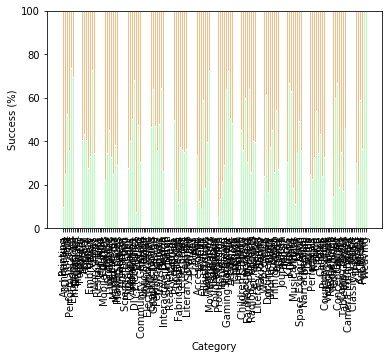

In [43]:
CategoryList = FullSetClean["category"].unique().tolist()

category_success = []
category_failure = []
names = set()

N = len(CategoryList)
ind = list(range(N))
Category_int = 0

for i in CategoryList:
    Successful = 0
    Failed = 0
    name = CategoryList[Category_int]
    names.add(name)
    tempDataFrame = FullSetClean[FullSetClean["category"] == i]
    for row in tempDataFrame["StateBin"]:
        if row == 1:
            Successful += 1
        else:
            Failed += 1
    category_success.append(Successful)
    category_failure.append(Failed)
    Category_int += 1
    
# print(names)
# print(category_success)
# print(category_failure) 

# Defines new dataframe from raw data:
data = {'Success': category_success, 'Failure': category_failure}
df = pd.DataFrame(data)

# From raw value to percentage:
totals = [i+j for i,j in zip(df['Success'], df['Failure'])]
successBars = [i / j * 100 for i,j in zip(df['Success'], totals)]
failureBars = [i / j * 100 for i,j in zip(df['Failure'], totals)]

# Plot:
barWidth = 0.85
# Create green Bars
plt.bar(ind, successBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(ind, failureBars, bottom=successBars, color='#f9bc86', edgecolor='white', width=barWidth)

# Custom x axis
plt.xticks(ind, names, rotation = 90)
plt.xlabel("Category")
plt.ylabel("Success (%)")
 
# Show graphic
plt.show()
